In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

In [78]:
data = pd.read_csv('YJMob100k/cell_POIcat.csv')  
data.head()

,x,y,POIcategory,POI_count
0,1,1,48,4
1,1,1,58,1
2,1,1,59,1
3,1,1,69,2
4,1,1,73,1


In [79]:
print(data['x'].max(), data['y'].max())

200 200


In [80]:
# Group x and y coordinates to form a 20x20 grid
data['grouped_x'] = (data['x'] -1 ) // 10 + 1
data['grouped_y'] = (data['y'] - 1) // 10 + 1
data.head()

,x,y,POIcategory,POI_count,grouped_x,grouped_y
0,1,1,48,4,1,1
1,1,1,58,1,1,1
2,1,1,59,1,1,1
3,1,1,69,2,1,1
4,1,1,73,1,1,1


In [81]:
print(data['grouped_x'].min(), data['grouped_y'].max())

1 20


In [82]:
# Aggregate POI_count in each cell
grouped_data = data.groupby(['grouped_x', 'grouped_y']).agg(total_POI_count=('POI_count', 'sum')).reset_index()
grouped_data.sort_values(by = 'total_POI_count', ascending = False)

,grouped_x,grouped_y,total_POI_count
205,14,9,32647
204,14,8,24370
185,13,9,14308
184,13,8,10183
302,19,6,9140
...,...,...,...
47,5,15,2
195,13,19,1
33,4,13,1
70,7,7,1


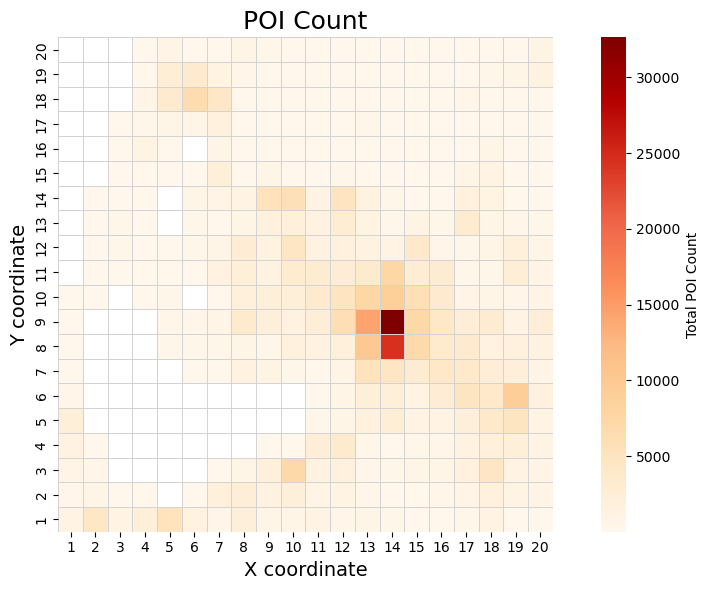

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to create a 20x20 matrix for the heatmap
heatmap_data = grouped_data.pivot(index='grouped_y', columns='grouped_x', values='total_POI_count')
heatmap_data = heatmap_data.fillna(0)  # Fill any missing values with 0 for empty cells

# Replace 0s with NaN for white color and apply log scale
heatmap_data = heatmap_data.replace(0, np.nan)  # Replace 0s with NaN

# Create a mask for NaN values
mask = heatmap_data.isna()

# Plotting the heat(map
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap="OrRd",
    cbar_kws={'label': 'Total POI Count'},
    linewidths=0.5,
    linecolor = 'lightgrey',
    square=True,
    mask=mask  # Mask NaN values
)

# Reverse the y-axis to align it with (0, 0) in the bottom left
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel('X coordinate', fontsize=14)
plt.ylabel('Y coordinate', fontsize=14)
plt.title('POI Count',fontsize=18)
plt.tight_layout()
plt.savefig('poi_heatmap.png', dpi=600)
plt.show()

20 20
grouped_x   1    2    3    4    5    6    7    8    9    10   11   12   13  \
grouped_y                                                                    
1          2.0  0.0  2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2          2.0  2.0  2.0  2.0  NaN  2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   
3          2.0  2.0  NaN  NaN  NaN  NaN  2.0  2.0  2.0  0.0  2.0  2.0  2.0   
4          2.0  2.0  NaN  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0  0.0  2.0   
5          2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0   
6          2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  2.0  2.0   
7          2.0  NaN  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.0   
8          2.0  NaN  NaN  NaN  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.0   
9          2.0  NaN  NaN  NaN  2.0  2.0  2.0  0.0  2.0  2.0  0.0  0.0  0.0   
10         2.0  2.0  NaN  2.0  2.0  NaN  2.0  2.0  2.0  2.0  0.0  0.0  0.0   
11         NaN  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.

/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


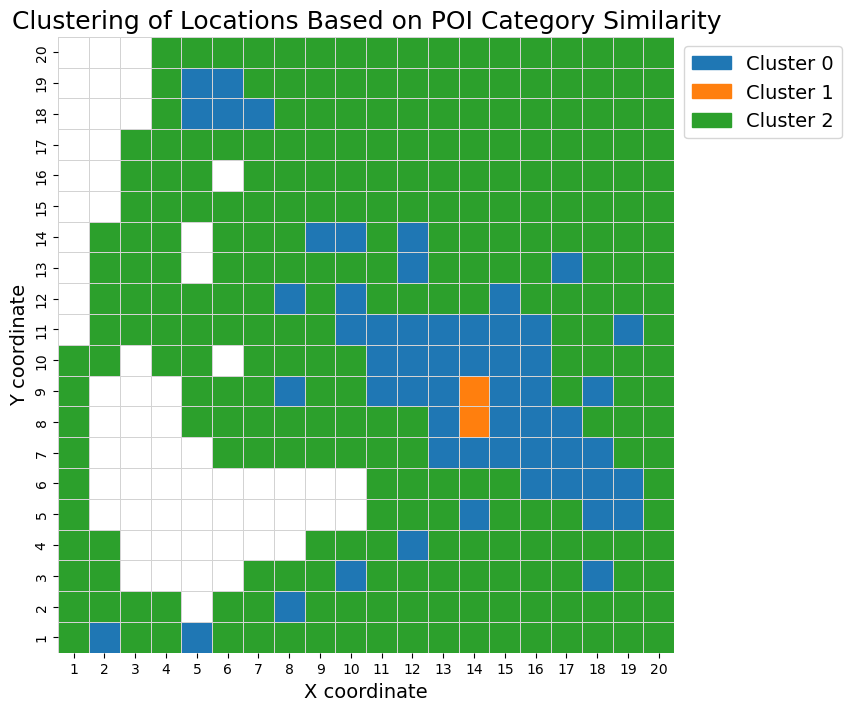

In [87]:
no_clusters = 3
# Group the data by 'grouped_x', 'grouped_y', and 'POIcategory', aggregating POI counts
data = pd.read_csv('YJMob100k/cell_POIcat.csv')  
# Group x and y coordinates to form a 20x20 grid
data['grouped_x'] = (data['x'] -1 ) // 10 + 1
data['grouped_y'] = (data['y'] - 1) // 10 + 1

grouped_data = data.groupby(['grouped_x', 'grouped_y', 'POIcategory']).agg(
    total_POI_count=('POI_count', 'sum')).reset_index()
max_x = grouped_data['grouped_x'].max()
max_y = grouped_data['grouped_y'].max()
print(max_x, max_y)
# Pivot to get each cell as a row, and POI categories as columns
pivot_df = grouped_data.pivot_table(index=['grouped_x', 'grouped_y'], columns='POIcategory',
                                    values='total_POI_count', fill_value=0)

# Scale the data to standardize the range of counts
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pivot_df)

# Apply KMeans clustering (adjust number of clusters as needed)
kmeans = KMeans(n_clusters=no_clusters, random_state=42)  # Set n_clusters to the desired number of clusters
pivot_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Reset the index to bring back 'grouped_x' and 'grouped_y' for plotting
pivot_df_reset = pivot_df.reset_index()

# Create a pivot table to map clusters back to the 20x20 grid for heatmap
cluster_map = pivot_df_reset.pivot(index='grouped_y', columns='grouped_x', values='Cluster')
print(cluster_map)

# Define a custom colormap for the clusters
colors = sns.color_palette("tab10", no_clusters)  # Generate a color palette with exactly `n_clusters` colors
cmap = ListedColormap(colors)

# Plotting the clusters
plt.figure(figsize=(10, 8))

# Use the custom colormap
sns_heatmap = sns.heatmap(cluster_map, cmap=cmap, square=True, annot=False, linewidths=0.5, linecolor = 'lightgray',
                          vmin=0, vmax=no_clusters - 1, cbar = False)

# Reverse the y-axis to align it with (0, 0) in the bottom left
plt.gca().invert_yaxis()

# Add a custom legend for clusters
cluster_labels = [f'Cluster {i}' for i in range(no_clusters)]  # Cluster labels like 'Cluster 0', 'Cluster 1', etc.
legend_patches = [Patch(color=colors[i], label=cluster_labels[i]) for i in range(no_clusters)]
plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1), fontsize=14)

# Labels and title
plt.xlabel('X coordinate', fontsize=14)
plt.ylabel('Y coordinate', fontsize=14)
plt.title('Clustering of Locations Based on POI Category Similarity',fontsize=18)

# Show the plot
plt.savefig('poi_clustering.png', dpi=600)
plt.show()


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette score is 0.915191069258376
For n_clusters = 3, the average silhouette score is 0.6603967073608971
For n_clusters = 4, the average silhouette score is 0.5908827389045288


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette score is 0.5218825206448071
For n_clusters = 6, the average silhouette score is 0.4402636421026415


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette score is 0.36925543890395757
For n_clusters = 8, the average silhouette score is 0.37023075436425107


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette score is 0.3601480794592899
For n_clusters = 10, the average silhouette score is 0.38661042041720806
Optimal number of clusters: 2


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


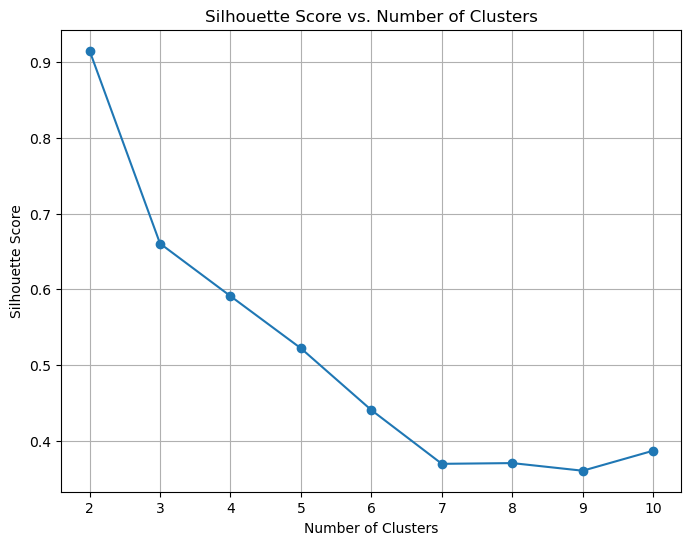

In [20]:
data = pd.read_csv('YJMob100k/cell_POIcat.csv')  

# Group x and y coordinates to form a 20x20 grid
data['grouped_x'] = (data['x'] // 10) + 1
data['grouped_y'] = (data['y'] // 10) + 1

# Aggregate the POI_count by grouped cell and POI category
grouped_data = data.groupby(['grouped_x', 'grouped_y', 'POIcategory']).agg(total_POI_count=('POI_count', 'sum')).reset_index()

# Pivot to get each cell as a row, and POI categories as columns
pivot_df = grouped_data.pivot_table(index=['grouped_x', 'grouped_y'], columns='POIcategory', values='total_POI_count', fill_value=0)

# Scale the data to standardize the range of counts
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pivot_df)

# Range of cluster numbers to evaluate
range_n_clusters = range(2, 11)  # Test from 2 to 10 clusters
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")

# Find the optimal number of clusters based on max silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Plot the silhouette scores for each n_clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()


/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/miniconda3/l

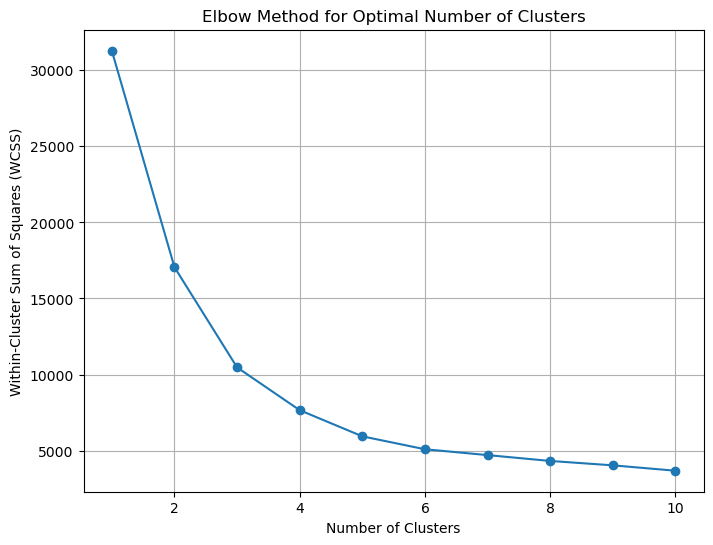

In [21]:
data = pd.read_csv('YJMob100k/cell_POIcat.csv')  

# Group x and y coordinates to form a 20x20 grid
data['grouped_x'] = (data['x'] // 10) + 1
data['grouped_y'] = (data['y'] // 10) + 1

# Aggregate the POI_count by grouped cell and POI category
grouped_data = data.groupby(['grouped_x', 'grouped_y', 'POIcategory']).agg(total_POI_count=('POI_count', 'sum')).reset_index()

# Pivot to get each cell as a row, and POI categories as columns
pivot_df = grouped_data.pivot_table(index=['grouped_x', 'grouped_y'], columns='POIcategory', values='total_POI_count', fill_value=0)

# Scale the data to standardize the range of counts
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pivot_df)

# Range of cluster numbers to evaluate
range_n_clusters = range(1, 11)  # Test from 1 to 10 clusters
wcss = []

# Calculate WCSS for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()


Optimal number of clusters according to the Kneedle method: 3


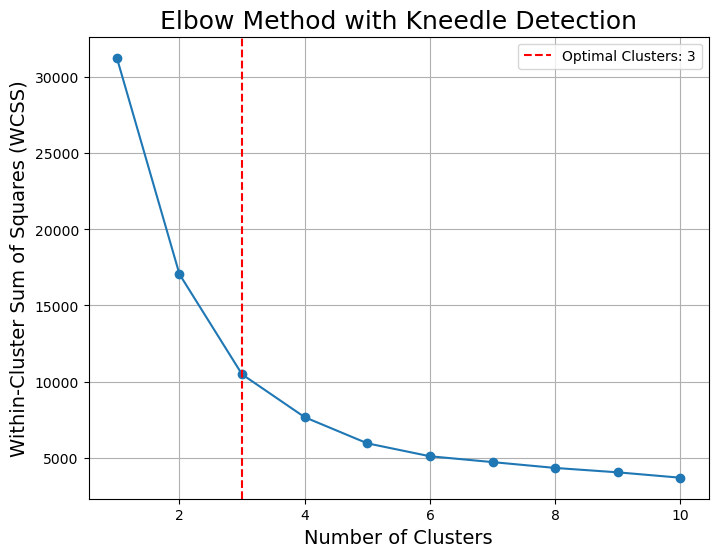

In [88]:
from kneed import KneeLocator

# Detect the elbow point using KneeLocator
kneedle = KneeLocator(range_n_clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow

print("Optimal number of clusters according to the Kneedle method:", optimal_clusters)
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.axvline(optimal_clusters, color='r', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.xlabel("Number of Clusters",fontsize=14)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=14)
plt.title("Elbow Method with Kneedle Detection", fontsize=18)
plt.legend()
plt.grid(True)
plt.savefig('elbow_method.png',dpi=600)
plt.show()